### 검색어를 입력받아서 ...?
##### 필요한 패키지를 설치

In [2]:
!pip install requests
!pip install beautifulsoup

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\USER\AppData\Local\Temp\pip-install-3kaaao55\beautifulsoup_ba2ec0a4dbe54d99a3e448f4fd875976\setup.py", line 3
      "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                     ^^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not p

### 검색어룰 입력받아서URL 만들기

In [17]:
#혹시 한글이 들어올 떄 인코딩을 위해서
from urllib.parse import quote
string = input('검색어를 입력하세요 : ')

keyword = quote(string)
print(keyword)

# +로 문자열 열결하기, format으로 연결하기
# target_url = 'https://www.yna.co.kr/search/index?ctype=A&sort=weight&query=' + keyword
target_url = 'https://www.donga.com/news/search?query={}&sorting=3&check_news=91|4|5|92&search_date=2&more=1'.format(keyword)


# 목표 url : https://www.donga.com/news/search?query=%ED%8B%B0%EB%B9%99&sorting=3&check_news=91|4|5|92&search_date=2&more=1

print(target_url)

검색어를 입력하세요 : 티빙
%ED%8B%B0%EB%B9%99
https://www.donga.com/news/search?query=%ED%8B%B0%EB%B9%99&sorting=3&check_news=91|4|5|92&search_date=2&more=1


## 첫 화면의 HTML 가져오기

In [20]:
# 정적인 웹의 데이터를 가져올 떄 사용하는 패키지
import requests
html = requests.get(target_url).text
print(html)

<!doctype html>
<html lang="ko">
<head>
<title>뉴스｜검색결과｜동아일보</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="description" content="대한민국을 대표하는 정론지 동아일보는 디지털 창인 동아닷컴과 함께 공정하고 정확한 뉴스로 독자 여러분과 더 나은 미래를 만들어 나가겠습니다." />
<meta name="writer" content="동아닷컴" />
<meta name="facebook-domain-verification" content="nyedn3qpatz7zur9vbmms5epehnszw" />
<meta name='referrer' content='unsafe-url'>

<link rel="image_src" href="https://image.donga.com/pc/2022/images/common/donga_icon.jpg" />
<link rel="canonical" href="https://www.donga.com/news/search" />

<link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_sub.css?t=20240101' /><link rel='stylesheet' type='text/css' href='https://image.donga.com/pc/2022/css/donga_search.css?t=20240101' />

<link rel="stylesheet" type="text/css" href="https://image.donga.com/donga/css.v.2.0/slick.css" />
<script async src='https://securepubad

## 기사 링크 가져오기
### 검색된 기사 개수

In [28]:
# HTML, XML 파싱에 사용하는 패키지
from bs4 import BeautifulSoup
#HTML 텍스트는 메모리에 트리 형태로 펼치기
bs = BeautifulSoup(html, 'html.parser')

#선택자는 동일한 데이터가 있을 수 있으므로 list
cnt = bs.select('div.cntPage > span')
# for x in cnt :
#     print(x.getText())

cnt = cnt[0].getText()
# print(cnt) 건 삭제!
# cnt = int(cnt[0:3])
cnt = int(cnt[0 : -1])
print(cnt)

680


In [56]:
#페이지 개수 찾아내기
pageno = int(cnt / 15 + 0.99)
# print(pageno)

#기사의 링크를 저장할 list
links = []

#url 을 순회하면서 기사 링크 가져오기
for i in range(pageno) :
    url = "https://www.donga.com/news/search?p={}&query={}&check_news=91&more=1&sorting=3&search_date=2&v1=&v2=".format(str(i*15 + 1), keyword)
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    linktag = bs.select('span.tit > a')
    for tag in linktag :
        # a 태크의 href 속성을 가져오기
        links.append(tag['href'])
        
print(links)
    

['#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'https://sports.donga.com/cartoon', 'https://idolpick.donga.com/', 'https://www.sinunse.com', '#', 'htt

### 기사 링크를 따라서 실제 기사를 읽어서 파일에 저장

In [52]:
#기록할 텍스트 파일을 생성

output_file = open(string + ".txt", 'w', encoding = 'utf8')

for link in links :
    html = requests.get(link).text
    bs = BeautifulSoup(html, 'html.parser')
    articles = bs.select('#article_txt > strong')
    for article in articles :
        #파일에 기록
        output_file.write(article.getText())
        
output_file.close()

MissingSchema: Invalid URL '#': No scheme supplied. Perhaps you meant https://#?

## Selenium 실레니움 으로 가져오기

### 패키지 설치

In [57]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/97/e3/fd7272d6d2c49fd49a79a603cb28c8b5a71f8911861b4a0409b3c006a241/selenium-4.17.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/14/fb/9299cf74953f473a15accfdbe2c15218e766bae8c796f2567c83bae03e98/trio-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing_extensions>=4.9.0 from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/55/8b/5ab7257531a5d830fc8000c476e63c935488d74609b50f9384a643e

In [61]:
from selenium import webdriver
import os

#드라이버 경로 설정
os.environ['webdriver.chrome.driver'] = "C:\\Users\\USER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"
driver = webdriver.Chrome()
#사이트 접속
driver.get('https://www.kakao.com')
#html 읽어오기
html = driver.page_source
print(html)

while(True) :
    pass

<html lang="ko" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ko%22%7D%7D" style="--baseBackground: #fff; --baseBackground1: rgba(255,255,255,.9); --baseForeground: #000; --colorBg1: #eee; --colorBg2: #eee; --colorBg3: #fff; --colorBg4: #111; --colorBg5: #eee; --colorBg6: #f4f4f4; --colorBg7: #f7f7f7; --colorBg8: #fcfcfc; --colorBg9: #333; --colorBg10: #fff; --colorBg11: #1a1a1a; --colorBg12: #444; --colorBg13: #dfdfdf; --colorBg14: #333; --colorBg15: #000; --colorBg16: #000; --colorBg17: #000; --colorBg18: #f7f7f7; --colorFg1: #333; --colorFg2: #111; --colorFg3: #000; --colorFg4: #000; --colorFg5: #666; --colorFg6: #666; --colorFg7: #333; --colorFg8: #ededed; --colorFg9: #333; --colorFg10: #333; --colorFg11: #666; --colorFg12: #666; --colorFg13: #888; --colorFg14: #888; --colorFg15: #bbb; --colorFg16: #e6e6e6; --colorFg17: #ebebeb; --colorFg18: #666; --colorFg19: #ededed; --colorFg20: #d8d8d8; --colorFg21: #fff; --colorFg22: #d8d8d8; --colorFg23: #888; --colorFg24: #666; --colorFg25: #66

KeyboardInterrupt: 

### 카카오 로그인

In [77]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import os

#드라이버 경로 설정
os.environ['webdriver.chrome.driver'] = "C:\\Users\\USER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"
driver = webdriver.Chrome()
#사이트 접속
driver.get('https://nid.naver.com/nidlogin.login')
#5초간 대기
driver.implicitly_wait(5)

userid = input('아이디')
password = input('비밀번호')

driver.execute_script("document.getElementsByName('id')[0].value=\'"+ userid+"\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'"+ password+"\'")
driver.find_element(By.XPATH, '//*[@id="log.login"]').click()

while(True) :
    pass

아이디kimga1014
비밀번호4gkdlzbskdhk!


KeyboardInterrupt: 

### 유튜브 스크롤(자바스크립트 수행)을 하면서 데이터를 수집

<html lang="ko"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="referrer" contents="always">
<title>167화. 뭐야, 멋있어, 악당 가족이 독립을 반대한다 : 네이버웹소설</title>





<link rel="shortcut icon" type="image/x-icon" href="https://ssl.pstatic.net/static/m/novel/icon_2020/favicon.ico">
<link rel="icon" sizes="32x32" href="https://ssl.pstatic.net/static/novel/naverwebnovel_32x32.png">
<link rel="stylesheet" href="/css/novel.css?1692597807000" type="text/css">



<script type="text/javascript" src="/js/lib/jquery-3.5.1.min.js"></script>
<script type="text/javascript" src="/js/lib/jquery-ui-1.13.2.js"></script>

<script type="text/javascript" src="/js/lib/egjs-flicking-4.6.3.pkgd.js"></script>
<link rel="stylesheet" href="/css/flicking.css">

<script type="text/javascript" src="/js/lib/es6-promise-4.2.8.auto.min.js"></script>
<script>
	var jQuery =
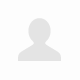
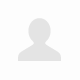

KeyboardInterrupt: 

In [75]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import os
import bs4
import time

#드라이버 경로 설정
os.environ['webdriver.chrome.driver'] = "C:\\Users\\USER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"
driver = webdriver.Chrome()
#사이트 접속
driver.get('https://novel.naver.com/webnovel/detail?novelId=1062246&volumeNo=167')
#5초간 대기
time.sleep(5)

i = 0

body = driver.find_element(By.TAG_NAME, 'body')
while i < 20 :
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(3)
    i = i + 1

#html 읽어오기
html = driver.page_source
print(html)

while(True) :
    pass

### 데이터 프래임 다루기

In [78]:
import numpy as np
import pandas as pd

In [79]:
#헤더가 없어서 컬럼 이름을 직접 설정
df = pd.read_csv('./data/auto-mpg.csv', header = None)
df.colnums = ['mpg', 'cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
print(df.head(10))


      0  1      2      3       4     5   6  7                          8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3  16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4  17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
5  15.0  8  429.0  198.0  4341.0  10.0  70  1           ford galaxie 500
6  14.0  8  454.0  220.0  4354.0   9.0  70  1           chevrolet impala
7  14.0  8  440.0  215.0  4312.0   8.5  70  1          plymouth fury iii
8  14.0  8  455.0  225.0  4425.0  10.0  70  1           pontiac catalina
9  15.0  8  390.0  190.0  3850.0   8.5  70  1         amc ambassador dpl


C:\Users\USER\AppData\Local\Temp\ipykernel_19656\2064811332.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colnums = ['mpg', 'cylinders','displacement','horsepower','weight',


In [ ]:
#행과 열의 수 확인
print(df.shape)
#자료형을 확인
print(df.dtypes)
#데이터 개수
print(df.count())

In [80]:
# 보통은 이걸로
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [81]:
#값의 개수와 빈도를 확인
#null 을 제외하고자 하는 경우는 옵션으로 dropna= True 를 설정하면 됩니다.
print(df['cylinders'].value_counts())

KeyError: 'cylinders'

In [ ]:
#기술 통계 확인-숫자 데이터에 관해서
print(df.describe(include = 'all'))